In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



In [ ]:
data = pd.read_csv("Earthquake_detect.csv")

In [ ]:
data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [ ]:
# preprocessing for all columns
data = data.fillna(method = 'ffill')

In [ ]:
data.to_csv('result.csv',index=False)

In [ ]:
data = pd.read_csv("earthquake.csv")

In [ ]:
data.shape

(8847, 26)

In [ ]:
# data1 = data[['latitude', 'longitude', 'depth', 'mag','typenum','horizontalError','depthError','magError','magNst','statusnum','locationnum','magSourcenum']] #two class lables.
data1 = data[['latitude', 'longitude', 'depth', 'mag','nst','gap','dmin','rms','typenum','horizontalError','depthError','magError','magNst','statusnum','locationnum']] #one class label.
data2 = data['type']
data1.head()
#data2.head()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,typenum,horizontalError,depthError,magError,magNst,statusnum,locationnum
0,7.051500,126.521800,184.24,4.40,4,125.0,0.93500,1.00,0,10.90,6.80,0.130000,19,1,12
1,18.011000,-67.065667,4.81,2.05,4,137.0,0.02308,0.07,0,1.57,1.75,0.041713,3,1,9
2,57.083100,-135.688300,1.70,1.80,22,95.0,0.02308,0.81,0,0.26,0.30,0.211000,18,0,0
3,61.661400,-150.051000,34.50,1.40,22,95.0,0.02308,0.73,0,0.26,0.20,0.211000,18,0,0
4,34.266667,-118.500167,12.78,1.54,22,95.0,0.02308,0.11,0,0.26,0.41,0.211000,18,1,2


In [ ]:
data3 = data2.map({'earthquake':0,'explosion':1,'ice quake':2,'quarry blast':3})
print(data3)

0       0
1       0
2       0
3       0
4       0
       ..
8842    3
8843    3
8844    3
8845    3
8846    3
Name: type, Length: 8847, dtype: int64


In [ ]:
#one class label.
x = data1.drop(['typenum'], axis =1).values # drop class label
y = data1['typenum'].values

In [ ]:
#double class labels.

# drop class label
# x = data1.drop(['typenum','locationnum'], axis =1).values 
# y = data1.drop(['latitude', 'longitude', 'depth', 'mag','horizontalError','depthError','magError','magNst','statusnum','magSourcenum'], axis = 1).values

In [ ]:
x

array([[   7.0515    ,  126.5218    ,  184.24      , ...,   19.        ,
           1.        ,   12.        ],
       [  18.011     ,  -67.06566667,    4.81      , ...,    3.        ,
           1.        ,    9.        ],
       [  57.0831    , -135.6883    ,    1.7       , ...,   18.        ,
           0.        ,    0.        ],
       ...,
       [  34.8506667 , -118.7826667 ,   -1.19      , ...,    7.        ,
           1.        ,    2.        ],
       [  46.0161667 , -112.4601667 ,   -2.        , ...,    7.        ,
           1.        ,    4.        ],
       [  34.9955    , -118.1818333 ,   -0.8       , ...,   13.        ,
           1.        ,    2.        ]])

In [ ]:
y

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
#START
#regression

# Two Class Label
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# One Class Label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [ ]:
#Train the model on the training set

ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predict the test results

y_pred = ml.predict(x_test)
y_pred

array([-0.03006518, -0.09848876,  0.00775774, ...,  0.02709126,
        0.06684629,  0.00038812])

In [ ]:
#Evaluate the Model

r2_score(y_test, y_pred)

0.2736649130548676

Text(0.5, 1.0, 'Actual vs Predicted')

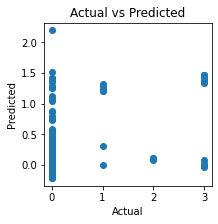

In [ ]:
# Plot the results

plt.figure(figsize = (3,3))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Actual vs Predicted')

In [ ]:
# Data frame for error rate

pred_y_df = pd.DataFrame({'Actual Value ' : y_test,'Predicted Value ' : y_pred,'Difference': y_test - y_pred})
pred_y_df

#END

,Actual Value,Predicted Value,Difference
0,0,-0.030065,0.030065
1,0,-0.098489,0.098489
2,0,0.007758,-0.007758
3,0,0.283608,-0.283608
4,0,0.055831,-0.055831
...,...,...,...
1765,0,-0.092685,0.092685
1766,0,0.207322,-0.207322
1767,0,0.027091,-0.027091
1768,0,0.066846,-0.066846


In [ ]:
#Decision Tree
#START

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[3 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.99


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

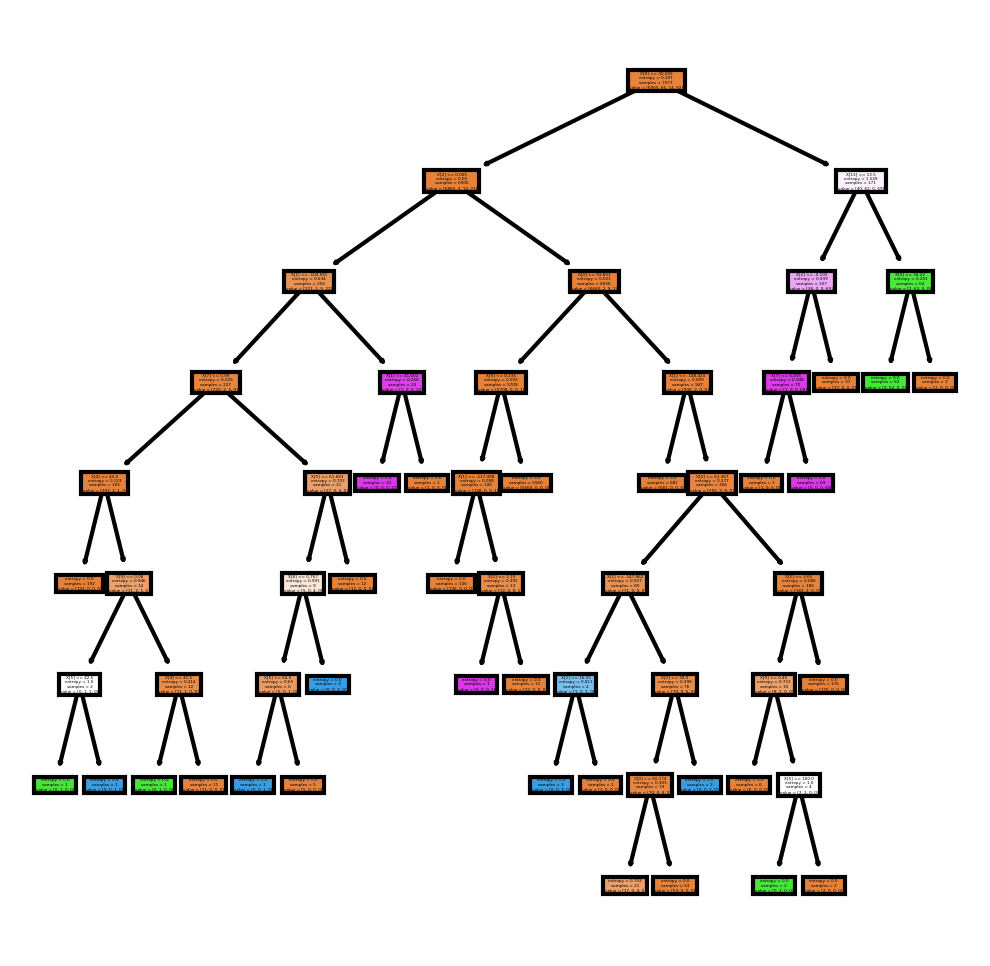

In [ ]:

feature_names = data1, 
class_names=(data2)
fig , axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300) 
tree.plot_tree(dt_entropy, filled = True);
fig.savefig('imagename.png')


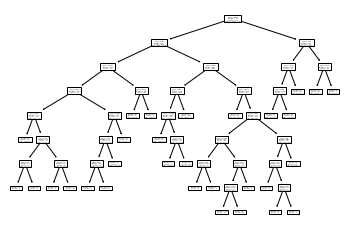

In [ ]:
tree.plot_tree(dt_entropy);


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 12)
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [ ]:
#states
print(ypred)

[0 0 0 ... 0 0 0]


In [ ]:
#k=5
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[1717    4    0    6]
 [   2   14    0    2]
 [   4    0    0    0]
 [   7    2    0   12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1727
           1       0.70      0.78      0.74        18
           2       0.00      0.00      0.00         4
           3       0.60      0.57      0.59        21

    accuracy                           0.98      1770
   macro avg       0.57      0.59      0.58      1770
weighted avg       0.98      0.98      0.98      1770

Accuracy: 0.9847457627118644


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 12)
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [ ]:
print(ypred)

[0 0 0 ... 0 0 0]


In [ ]:
#k=3
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print(type(result1[0]))
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[1715    4    0    8]
 [   4   12    0    2]
 [   4    0    0    0]
 [   5    2    0   14]]
Classification Report:
<class 'str'>
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1727
           1       0.67      0.67      0.67        18
           2       0.00      0.00      0.00         4
           3       0.58      0.67      0.62        21

    accuracy                           0.98      1770
   macro avg       0.56      0.58      0.57      1770
weighted avg       0.98      0.98      0.98      1770

Accuracy: 0.9836158192090395


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!apt-get install graphviz
!pip install dtreeviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from sklearn.datasets import *
#from sklearn import tree
#from dtreeviz.trees import *

In [ ]:
#classifier = tree.DecisionTreeClassifier(max_depth=4)
#earthquake = load_earthquake()
#classifier.fit(earthquake.data, earthquake.target)
#viz = dtreeviz(classifier,
 #             x.data1.drop(['typenum'].values,
 #             y.data1.values,
  #            target_name='typenum',
   #           feature_names=data1.feature_names, 
    #          class_names=(data2),
     #         fancy=False )  )
#viz.view()

In [ ]:
#from IPython.core.display import display, HTML
#display(HTML(dt_entropy.svg()))

In [ ]:
#new way to visualize tree
#from dtreeviz.trees import dtreeviz

#viz = dtreeviz(dt_entropy, x, y,
#               target_name="target",
#               feature_names=data1,
#              class_names=data2)

#viz
#viz.save("decision_tree.svg")

In [ ]:
#predicting
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x, y)
#enter in the format as 'latitude(B)', 'longitude(C)', 'depth(D)', 'mag(E)','nst(G)','gap(H)','dmin(I)','rms(J)','horizontalError(Q)','depthError(R)','magError(S)','magNst(T)','statusnum(U)','locationnum(W)'
#testSet = [[18.011,-67.06566667,4.81,2.05,4,137,0.02308,0.07,1.57,1.75,0.041712809,3,1,9]]  #earthquake
testSet=[[34.9955,	-118.1818333,	-0.8,	1.65,29,	47,	0.1226,	0.21,	0.33,	31.61,	0.111,	13,	1,2]]
test = pd.DataFrame(testSet)
y_pred = classifier.predict(testSet)

if y_pred == 0 :
  print("Earth Quake")
elif y_pred==1:
  print("Explosion")
elif y_pred==2:
  print("Ice Quake")
else:
  print("Quarry Blast")

Quarry Blast


In [ ]:
#enter in the format as 'latitude(B)', 'longitude(C)', 'depth(D)', 'mag(E)','nst(G)','gap(H)','dmin(I)','rms(J)','horizontalError(Q)','depthError(R)','magError(S)','magNst(T)','statusnum(U)','locationnum(W)'
#testSet = [[67.33,-113.06566667,5.8,1.8,121,2.7,3.0,0.08786,3,1,9]] 
#testSet=[[42.93,-120.3773,-1.2,1.9,0.8,31,0.1,5,1,14]] #explosion
#testSet=[[34.9955,-118.1818333,-0.8,1.65,0.33,31.61,0.111,13,1,2]]   #quarry blast